# Introduction to Scikit-learn (sklearn)

This notebook demostrate some of the most useful functions of the beautiful Scikit-learn library.

What we're going to cover:

0. An end-to-end Scikit-learn workflow
1. Getting the data ready
2. Choose the right estiator/algorithm for our problems
3. Fit the model/algorithm and use it to make preductions to our data
4. Evaluate a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 0. And end to end Scikit-learn workflow

In [1]:
# Standard import
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Getting the data ready
heart_disease = pd.read_csv('data\heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [5]:
# 2. Choose the rigth model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
X.shape, y.shape

((303, 13), (303,))

In [7]:
# 3. Fit the model to training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# 3. Fit the model/algorithm and use it to make predictions on our data
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [11]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.8360655737704918

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.81      0.87      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [15]:
print(confusion_matrix(y_test, y_pred))

[[25  6]
 [ 4 26]]


In [16]:
print(accuracy_score(y_test, y_pred))

0.8360655737704918


In [17]:
# 5. Improve the model
# Try different amount of n_stimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100}')
    print('')

Trying model with 10 estimators...
Model accuracy on test set: 75.40983606557377

Trying model with 20 estimators...
Model accuracy on test set: 81.9672131147541

Trying model with 30 estimators...
Model accuracy on test set: 80.32786885245902

Trying model with 40 estimators...
Model accuracy on test set: 80.32786885245902

Trying model with 50 estimators...
Model accuracy on test set: 78.68852459016394

Trying model with 60 estimators...
Model accuracy on test set: 81.9672131147541

Trying model with 70 estimators...
Model accuracy on test set: 80.32786885245902

Trying model with 80 estimators...
Model accuracy on test set: 81.9672131147541

Trying model with 90 estimators...
Model accuracy on test set: 80.32786885245902



In [18]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model.pkl', 'wb'))

In [19]:
load_model = pickle.load(open('random_forest_model.pkl', 'rb'))
load_model.score(X_test, y_test)

0.8032786885245902

## 1. Getting the data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually 'x' & 'y')
    2. Filling (also called inputing) or disregarding values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into traingin and test test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, x_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, x_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical!

In [25]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# Split into X & y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split into tranining and test sets
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')

X_tranformer = tranformer.fit_transform(X)
X_tranformer

In [ ]:
pd.DataFrame(X_tranformer)

In [ ]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_tranformer, y, test_size=0.2)

In [30]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'

In [31]:
model.score(X_test, y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 1.2 Missing values?

1. Fill them with some value (also know as imputation)
2. Remove the samples with missing data altogether.

In [32]:
# Import car sales missing data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# let's try to convert data to numbers

In [35]:
# Create X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')

X_tranformer = tranformer.fit_transform(X)
X_tranformer

ValueError: Input contains NaN

#### Option 1 : Fill missing data with pandas

In [37]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the 'Odomether (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [38]:
# Check out the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [39]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [40]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
len(car_sales_missing)

950

In [42]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')

X_tranformer = tranformer.fit_transform(car_sales_missing)
X_tranformer

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-learn

In [44]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [48]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_inputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [49]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make','Colour','Doors','Odoneter (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odoneter (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [50]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odoneter (KM)    0
dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')

X_tranformer = tranformer.fit_transform(car_sales_filled)
X_tranformer

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tranformer,
                                                   y)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21020722035944994

In [53]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Chosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning modelo or algorithm.

* Classification: Predicting whether a sample is one thing or another.
* Regression:     Predicting a number.

### 2.1 Picking a machine learning model for a regression problem

In [54]:
# Import the Boston Housing dataset.
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [55]:
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(data=boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
# How many samples?
len(boston_df)

506

In [57]:
# Try the Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge Model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on the test data
model.score(X_test, y_test)

0.6662221670168519

How we can improve this score?

What if Ridge wasn't working?

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [58]:
# Let's try random forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [60]:
# Check the Ridge model
model.score(X_test, y_test)

0.6662221670168519

### 2.2 Chosse and estimator for a classification problem

Let's use the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [61]:
model = RandomForestRegressor(n_jobs=-1)

In [62]:
hear_disease = pd.read_csv('data/heart-disease.csv')
hear_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
# Check number of samples
len(hear_disease)

303

In [64]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# setup the random seeed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Linear Classifier
svc = LinearSVC()
svc.fit(X_train, y_train)

# Evaluate the Linear Classifier
svc.score(X_test, y_test)

0.8688524590163934

In [65]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup the random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
rfc.score(X_test, y_test)

0.8524590163934426

Tidbit:
    1. If you have structured data, used ensemble methods.
    2. If you have unstructure data, used deep learning or transfer learning.


## 3. Fit model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to data

In [67]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

In [68]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make prediction using a machine learning model
2 ways to make preductions

 * `predict()`
 * `predict_proba()`

In [69]:
# Use a trained modelo to make predictions

clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
# Compare prediction to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make prediction with `predict_prob()`

In [74]:
# predict_proba() returns probabilities of a classification label

clf.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [75]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can be used for regression models

In [76]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [77]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [78]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [79]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

# On averge this is the value away from the target
mean_absolute_error(y_test, y_preds)

2.136382352941176

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators
    
1. Estimator `score` method
2. The `scoring` parameter.
3. Problem-specif metric functions.

## 4.1 Evaluation the model with the score method

In [80]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [82]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [83]:
model.score(X_test, y_test)

0.8654448653350507

## 4.2 Evaluating a model using the `scoring` parameter

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make the data sets
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate the model
crf = RandomForestClassifier()

# Fit the model
crf.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
clf.score(X_test, y_test)

0.8524590163934426

### Cross Validation

![](../images/cross-validation.jpg)

In [86]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [87]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [88]:
# Default scoring parameter set to None by default
clf.score

<bound method ClassifierMixin.score of RandomForestClassifier()>

In [89]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classfication model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate the model
rfc = RandomForestClassifier()

# fit the model
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [91]:
np.mean(cross_val_score)

0.8215300546448088

In [92]:
print(f'Heart Disease Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f} %')

Heart Disease Classifier Accuracy: 82.15 %


![](../images/roc-curve.jpg)

## AUC / ROC

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under the curve (AUC)
* Receiver operating characteristic (ROC)

ROC curves are comparison of a model's true positive rate (TPR) versus a models false positive (FPR).

* True Posivites = model predicts 1 when truth is 1
* False Posivites = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negarive = model predicts 0 when truth is 1

In [93]:
# Create the X_train, ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [95]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [96]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a function for plotting the ROC Curves

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (FPR)
    and true posivite rate (TPR)
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color='red', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='blue', label='Guessing', linestyle='--')
    
    # Customize the plot
    plt.xlabel('False Positve Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

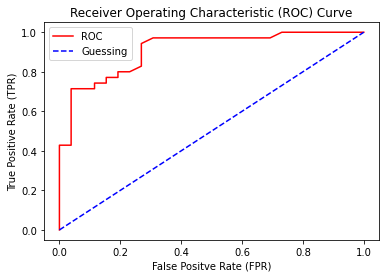

In [98]:
plot_roc_curve(fpr, tpr)

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

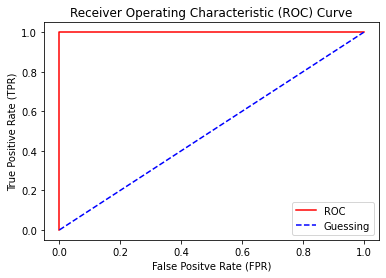

In [100]:
# A perfect ROC curve with a AUC value of 1

fpt, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpt, tpr)

In [101]:
roc_auc_score(y_test, y_test)

1.0

![](../images/ROC-AUC-remainders.jpg)

## Confusion Matrix

![](../images/confusion-matrix-anatomy.jpg)

Confusion Matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predic.

In essence, giving you an idea of where the model is getting confused

In [102]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [103]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,21,5
1,8,27


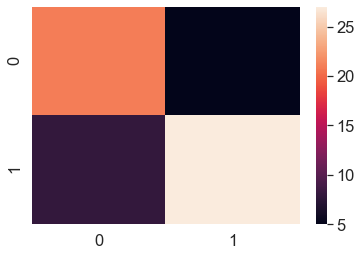

In [104]:
# Make our confussion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot in using Seaborn
sns.heatmap(conf_mat)

In [105]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel('Predict label')
    plt.ylabel('True Label')
    
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

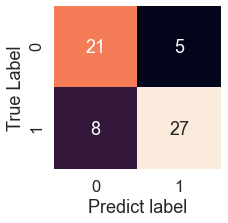

In [106]:
plot_conf_mat(conf_mat)

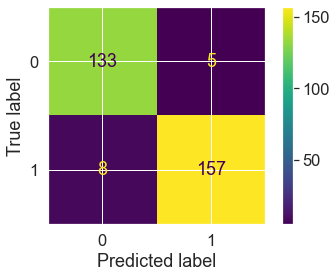

In [107]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

## Classification Report

![](../images/classification-report-anatomy.jpg)

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse that false negatives, aim for higher precision.
* If false negative predictions are worse that false positives, aim for higher recall.
* **F1-Score** is combination of precission and recall.

### 4.2.2 Regression model evaluation metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

1. **R^2** (pronounced r-squared) or coefficient of determiantion.
2. Mean abosulte error **(MAE)**
3. Mean squared error **(MSE)**

## R^2
**R^2:** Compares your models predictions to the mean of the targers. Values can range from negative infinity 
    (a very poor model) to 1.
    

In [110]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [111]:
model.score(X_test, y_test)

0.8654448653350507

In [112]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [113]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [114]:
y_test.mean()

21.488235294117654

In [115]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [116]:
r2_score(y_test, y_test)

1.0

## **Mean absolute error (MAE)**

MAE is the average of the absolute between predictions and actual values. It gives and idea of how wrong your model predictions are.

In [117]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [118]:
df = pd.DataFrame(data={'actual values': y_test,
                        'predicted values': y_preds})
df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


## **Mean Squared Error (MSE)**

In [119]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [120]:
# Calculate MSE by hand
squared = df['differences'] ** 2
squared.mean()

9.867437068627439

### 4.23 Finilly using the `scoring` parameter

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [122]:
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [123]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [124]:
# Cross-validation accuracy
print(f'The cross-validation accurasy is: {np.mean(cv_acc)*100:.2f} %')

The cross-validation accurasy is: 82.48 %


In [125]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
np.mean(cv_acc)

0.8248087431693989

In [126]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
np.mean(cv_precision)

0.8085601538512754

In [127]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
np.mean(cv_recall)

0.8424242424242424

In [128]:
# F1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
np.mean(cv_f1)

0.841476533416832

How about the regression model?

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [130]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [131]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
np.mean(cv_r2)

0.6243870737930857

In [132]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [133]:
# Mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-21.261442856882137

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy \t: {accuracy_score(y_test, y_preds)*100:.2f} %')
print(f'Precision \t: {precision_score(y_test, y_preds)*100:.2f} %')
print(f'Recall \t\t: {recall_score(y_test, y_preds)*100:.2f} %')
print(f'F1 \t\t: {f1_score(y_test, y_preds)*100:.2f} %')

Classifier metrics on the test set
Accuracy 	: 85.25 %
Precision 	: 84.85 %
Recall 		: 87.50 %
F1 		: 86.15 %


**Regression evaluation functions**

In [135]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaliate the regressor
print('Regressor metrics on the test set')
print(f'R^2 \t\t\t: {r2_score(y_test, y_preds):.4f}')
print(f'Mean Absolute Error \t: {mean_absolute_error(y_test, y_preds):.4f}')
print(f'Mean Squared Error \t: {mean_squared_error(y_test, y_preds):.4f}')

Regressor metrics on the test set
R^2 			: 0.8654
Mean Absolute Error 	: 2.1364
Mean Squared Error 	: 9.8674


## 5. Improve a Model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model to use?
* Could we improve the current model?

Hyperparameters vs Parameters
* `Parameters` = model find these patters in data
* `Hyperparameters` = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters
    1. By hand
    2. Randomly with RandomSearchCV
    3. Exhaustively with GridSearchCV

In [137]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [139]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning

Let's make 3 sets, training, validation and set

We are going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [150]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparasion on y_true labels vs y_preds labels
    on a classification.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metrics_dict = {"accuracy" : round(accuracy, 2),
                    "precision" : round(precision, 2), 
                    "recall" : round(recall, 2), 
                    "f1": round(recall, 2)}
    
    print(f'Acc: {accuracy * 100:.2f} %')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    
    return metrics_dict

In [151]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validate y test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [153]:
np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on Validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22 %
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [164]:
np.random.seed(42)

# Create a model second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaludate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00 %
Precision: 0.81
Recall: 0.84
F1 score: 0.82


# 5.2 Hyperparameter tuning with RandomizedSearcCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 300, 400, 500],
        "max_depth" : [None, 5, 10, 20, 30],
        "max_features" : ['auto','sqrt'],
        "min_samples_split" : [2, 4, 6, 8],
        "min_samples_leaf" : [1, 2, 4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifer
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedReachCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version with clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=400, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=400, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=400, min_samples_split=4, min_samp

[CV]  n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=8, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.5s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [178]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [179]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25 %
Precision: 0.79
Recall: 0.93
F1 score: 0.85


# 5.3 Hyperparameters tuning with GridSearchCV

In [193]:
grid_2 = {"n_estimators" : [100, 200, 300],
          "max_depth" : [None, 5, 10, 20],
          "max_features" : ['auto','sqrt'],
          "min_samples_split" : [4, 6, 8],
          "min_samples_leaf" : [2, 4, 6]}

In [188]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifer
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)

# Fit the RandomizedSearchCV version with clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=6, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=6, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   0.3s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=   0.3s


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  4.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [189]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [190]:
# Make prediction with the best hyperparameter found by GridSearchCV
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61 %
Precision: 0.76
Recall: 0.93
F1 score: 0.84


Let's compare the different models metrics.

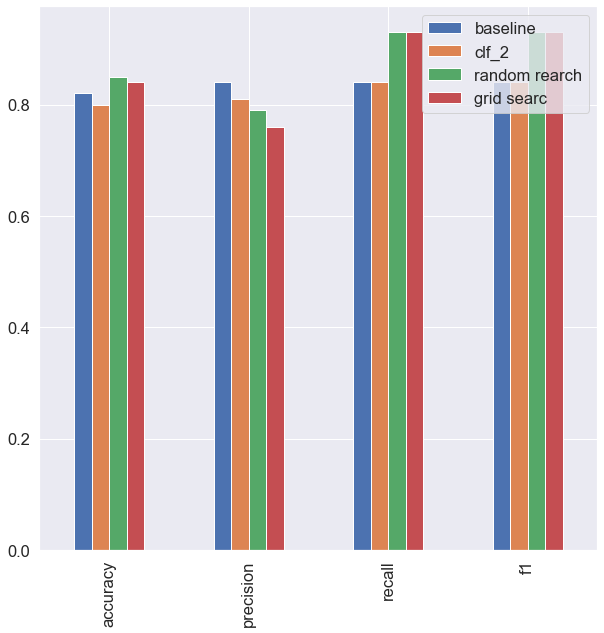

In [194]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'clf_2': clf_2_metrics,
                                'random rearch': rs_metrics,
                                'grid searc': gs_metrics})

compare_metrics.plot.bar(figsize=(10,10),)